# CIFAR100 - Categorical Classification
> # Convolutional Neural Network
## Import Keras

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import keras
from keras.datasets import cifar100
from keras.utils import to_categorical
from keras import models
from keras import layers

In [3]:
from sklearn.model_selection import train_test_split

# I. CIFAR100 Data_Set Load

In [4]:
(train_data, train_targets), (X_test, y_test) = cifar100.load_data(label_mode = 'fine')

169009152/169001437 [==============================] - 10s 0us/step


# II. Data Preprocessing

> ## 1) Reshape and Normalization

* reshape

In [5]:
train_data = train_data.reshape((50000,  32, 32, 3))
X_test = X_test.reshape((10000,  32, 32, 3))

* Normalization

In [6]:
train_data = train_data.astype(float) / 255
X_test = X_test.astype(float) / 255

> ## 2) One Hot Encoding

In [7]:
train_targets = to_categorical(train_targets)
y_test = to_categorical(y_test)

In [35]:
X_train, X_valid, y_train, y_valid = train_test_split(train_data, train_targets,
                                                      test_size = 0.2,
                                                      random_state = 2045)

X_train.shape, X_valid.shape, y_train.shape, y_valid.shape

((40000, 32, 32, 3), (10000, 32, 32, 3), (40000, 100), (10000, 100))

# III. MNIST Keras Modeling

> ## 1) Model Define

In [36]:
model = models.Sequential()

model.add(layers.Conv2D(filters=128, kernel_size=(3,3), activation='relu',
                        input_shape=(32, 32, 3)))
model.add(layers.Conv2D(filters=128, kernel_size=(3,3), activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(layers.Conv2D(filters=128, kernel_size=(3,3), activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(layers.Conv2D(filters=128, kernel_size=(3,3), activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(units=256, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(units=100, activation='softmax'))

In [31]:
# first attemp

model = models.Sequential()
model.add(layers.Conv2D(filters=128, kernel_size=(3,3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(layers.Conv2D(filters=128, kernel_size=(3,3), activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(layers.Conv2D(filters=128, kernel_size=(3,3), activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(units=256, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(units=100, activation='softmax'))

In [37]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_32 (Conv2D)           (None, 30, 30, 128)       3584      
_________________________________________________________________
conv2d_33 (Conv2D)           (None, 28, 28, 128)       147584    
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 14, 14, 128)       0         
_________________________________________________________________
conv2d_34 (Conv2D)           (None, 12, 12, 128)       147584    
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 6, 6, 128)         0         
_________________________________________________________________
conv2d_35 (Conv2D)           (None, 4, 4, 128)         147584    
_________________________________________________________________
flatten_7 (Flatten)          (None, 2048)             

> ## 2) Model Compile

* 모델 학습방법 설정

In [38]:
model.compile(loss = 'categorical_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

> ## 3) Model Fit

* 약 5분

In [39]:
%%time

Hist_mnist = model.fit(X_train, y_train,
                       epochs = 50,
                       batch_size = 128,
                       validation_data = (X_valid, y_valid))

Epoch 1/50
313/313 [==============================] - 16s 48ms/step - loss: 4.4523 - accuracy: 0.0257 - val_loss: 3.8066 - val_accuracy: 0.1097
Epoch 2/50
313/313 [==============================] - 15s 47ms/step - loss: 3.8196 - accuracy: 0.1104 - val_loss: 3.3960 - val_accuracy: 0.1901
Epoch 3/50
313/313 [==============================] - 15s 47ms/step - loss: 3.4603 - accuracy: 0.1694 - val_loss: 3.0831 - val_accuracy: 0.2494
Epoch 4/50
313/313 [==============================] - 15s 47ms/step - loss: 3.2068 - accuracy: 0.2185 - val_loss: 2.9483 - val_accuracy: 0.2743
Epoch 5/50
313/313 [==============================] - 15s 47ms/step - loss: 3.0140 - accuracy: 0.2541 - val_loss: 2.7850 - val_accuracy: 0.3133
Epoch 6/50
313/313 [==============================] - 15s 47ms/step - loss: 2.8658 - accuracy: 0.2825 - val_loss: 2.7157 - val_accuracy: 0.3183
Epoch 7/50
313/313 [==============================] - 15s 47ms/step - loss: 2.7189 - accuracy: 0.3082 - val_loss: 2.6143 - val_accuracy:

> ## 4) 학습 결과 시각화

* Loss Visualization

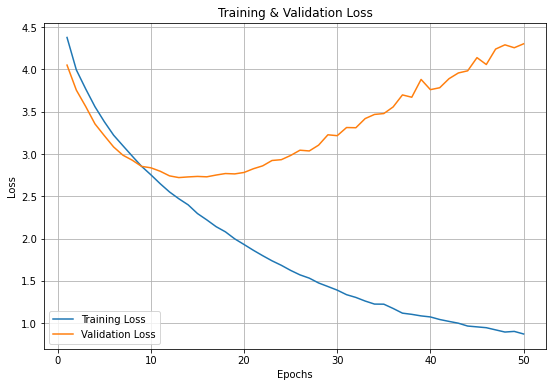

In [19]:
import matplotlib.pyplot as plt

epochs = range(1, len(Hist_mnist.history['loss']) + 1)

plt.figure(figsize = (9, 6))
plt.plot(epochs, Hist_mnist.history['loss'])
plt.plot(epochs, Hist_mnist.history['val_loss'])
# plt.ylim(0, 0.4)
plt.title('Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training Loss', 'Validation Loss'])
plt.grid()
plt.show()

> ## 5) Model Evaluate

* Loss & Accuracy

In [40]:
loss, accuracy = model.evaluate(X_test, y_test)

print('Loss = {:.5f}'.format(loss))
print('Accuracy = {:.5f}'.format(accuracy))

313/313 [==============================] - 2s 7ms/step - loss: 3.6704 - accuracy: 0.3837
Loss = 3.67038
Accuracy = 0.38370


In [26]:
loss, accuracy = model.evaluate(X_test, y_test)

print('Loss = {:.5f}'.format(loss))
print('Accuracy = {:.5f}'.format(accuracy))

313/313 [==============================] - 2s 8ms/step - loss: 3.7970 - accuracy: 0.3688
Loss = 3.79702
Accuracy = 0.36880


# 
# 
# 
# The End
# 
# 
# 